In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

df = pd.read_csv("Data\\train_preprocess.tsv.txt", sep='\t', names=['tweet','label'])

MELIHAT DATASET

In [16]:
df.head()

,tweet,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [17]:
df.head()

,tweet,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [18]:
df.shape

(11000, 2)

In [19]:
df.label.value_counts()

label
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

NORMALISASI DATA

In [20]:
# mengecek missing values
df.isna().sum()

tweet    0
label    0
dtype: int64

In [21]:
# mengecek data duplikat
df.duplicated().sum()

67

In [22]:
# menghapus data duplikat
df = df.drop_duplicates()

In [23]:
# mengecek data duplikat lagi
df.duplicated().sum()

0

In [24]:
df.shape

(10933, 2)

In [25]:
df.label.value_counts()

label
positive    6383
negative    3412
neutral     1138
Name: count, dtype: int64

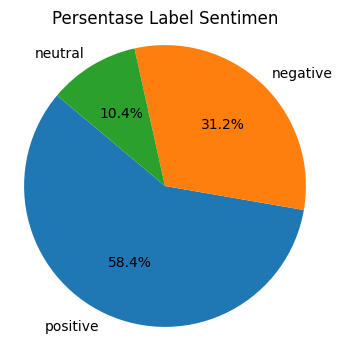

In [26]:
sentiment_counts = df['label'].value_counts()

# Membuat plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%' , startangle=140)
plt.axis('equal')  
plt.title('Persentase Label Sentimen')
plt.show()

In [27]:
#membuat fungsi data cleansing
def clean_text(text):
    # Lowercase teks
    text = text.lower()
    # Menghapus karakter selain huruf, angka, dan spasi menggunakan regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenisasi teks
    tokens = word_tokenize(text)
    # Menghapus stopwords bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))  # Menggunakan stopwords bahasa Indonesia
    stop_words.update(["nya"])
    tokens = [word for word in tokens if word not in stop_words]
    # Gabungkan kembali token-token menjadi teks
    clean_text = ' '.join(tokens)
    return clean_text
    

# Membersihkan kolom 'tweet' dalam dataframe
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

# Menampilkan hasil
print(df.head(10))

                                               tweet     label  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2  lokasi strategis di jalan sumatera bandung . t...  positive   
3  betapa bahagia nya diri ini saat unboxing pake...  positive   
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative   
5  makanan beragam , harga makanan di food stall ...  positive   
6  pakai kartu kredit bca tidak untung malah rugi...  negative   
7  tempat unik , bagus buat foto , makanan enak ,...  positive   
8  saya bersama keluarga baru saja menikmati peng...  positive   
9                                          bersyukur  positive   

                                       cleaned_tweet  
0  warung dimiliki pengusaha pabrik puluhan terke...  
1  mohon ulama lurus k212 mmbri hujjah partai diw...  
2  lokasi strategis jalan sumatera bandung nyaman...  
3  betapa bahagia unboxing paket barang bagus men... 

In [28]:
#sortir data berdasarkan tiga sentimen
neg = df.loc[df['label'] == 'negative'].cleaned_tweet.tolist()
neu = df.loc[df['label'] == 'neutral'].cleaned_tweet.tolist()
pos = df.loc[df['label'] == 'positive'].cleaned_tweet.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" %(len(total_data)))

Pos: 6383, Neu: 1138, Neg: 3412
Total data: 10933
